In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [201]:
data = pd.read_csv('train.csv')
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [202]:
data.count()

ClientPeriod                5282
MonthlySpending             5282
TotalSpent                  5282
Sex                         5282
IsSeniorCitizen             5282
HasPartner                  5282
HasChild                    5282
HasPhoneService             5282
HasMultiplePhoneNumbers     5282
HasInternetService          5282
HasOnlineSecurityService    5282
HasOnlineBackup             5282
HasDeviceProtection         5282
HasTechSupportAccess        5282
HasOnlineTV                 5282
HasMovieSubscription        5282
HasContractPhone            5282
IsBillingPaperless          5282
PaymentMethod               5282
Churn                       5282
dtype: int64

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

So i think data is clear and there is no nan values, but TotalSpent is object not int, that is why i think we will find null values here later.

<Axes: xlabel='Churn', ylabel='Count'>

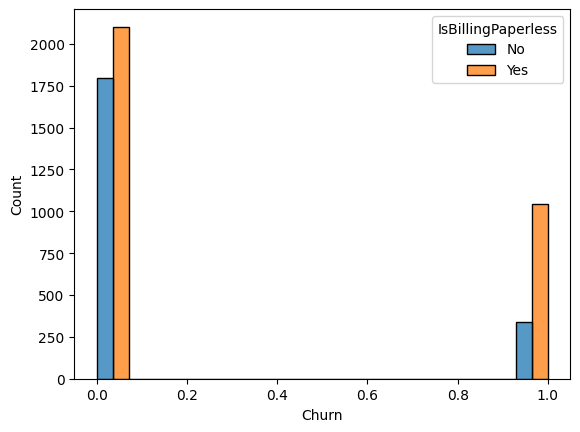

In [204]:
sns.histplot(data = data,hue = "IsBillingPaperless",x = "Churn",multiple="dodge")

<Axes: xlabel='Churn', ylabel='Count'>

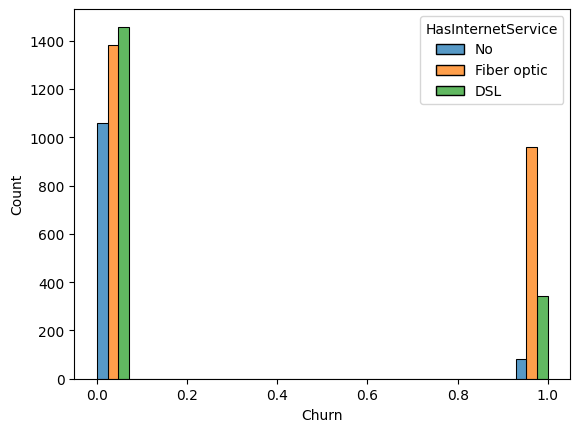

In [205]:
sns.histplot(data = data,hue = "HasInternetService",x = "Churn",multiple="dodge")

Thats can be usefull. As we can see if client has Fiber optic probability is much higher.

<Axes: xlabel='MonthlySpending', ylabel='Count'>

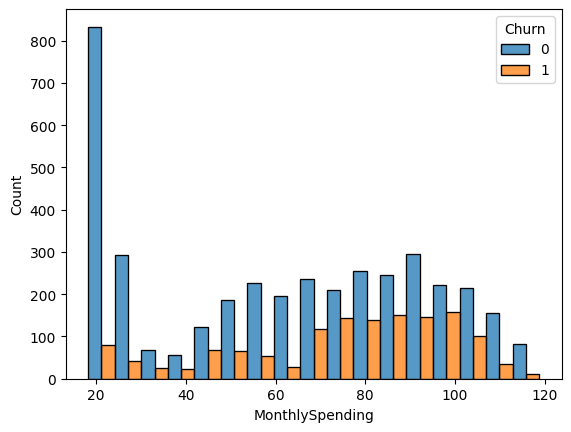

In [206]:
sns.histplot(data = data,x = "MonthlySpending",hue = "Churn",multiple="dodge")

<Axes: xlabel='Churn', ylabel='Count'>

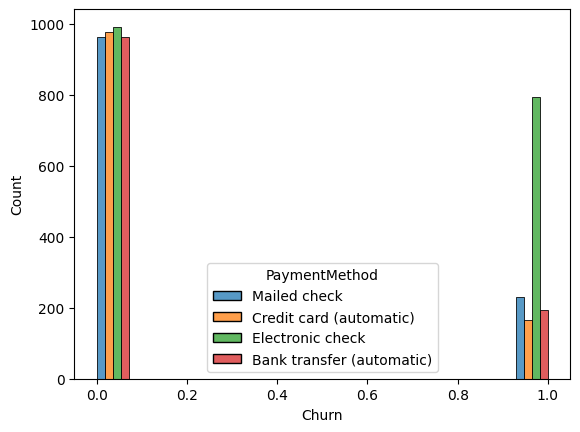

In [207]:
sns.histplot(data = data,hue = "PaymentMethod",x = "Churn",multiple="dodge")

In [208]:
data.where(data['TotalSpent'] == ' ').dropna()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0.0,25.75,,Male,0.0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.0
1707,0.0,73.35,,Female,0.0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0.0
2543,0.0,19.70,,Male,0.0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0.0
3078,0.0,80.85,,Female,0.0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0.0
3697,0.0,20.00,,Female,0.0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.0
4002,0.0,61.90,,Male,0.0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0.0
4326,0.0,25.35,,Male,0.0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0.0
4551,0.0,52.55,,Female,0.0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0.0
4598,0.0,56.05,,Female,0.0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0.0


In [209]:
filler = data.TotalSpent.where(data['TotalSpent'] != ' ').median()

In [210]:
data['TotalSpent'] = data['TotalSpent'].where(data['TotalSpent'] != ' ').fillna(filler)
data.TotalSpent = pd.to_numeric(data.TotalSpent)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

<Axes: >

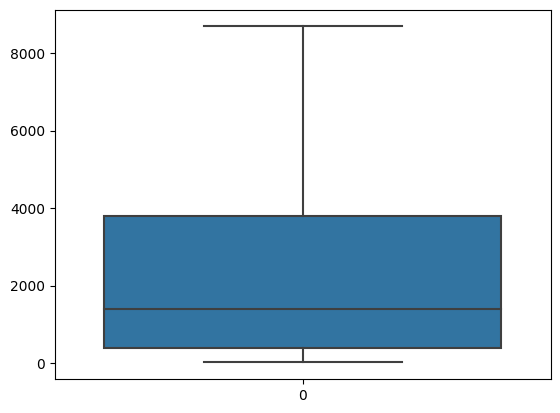

In [211]:
sns.boxplot(data.TotalSpent)

In [212]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore',sparse=False)

In [213]:
transformed_columns = pd.DataFrame(enc.fit_transform(data[['Sex',
                       'HasPartner',
                       'HasChild',
                       'HasPhoneService',
                       'HasMultiplePhoneNumbers',
                       'HasInternetService',
                       'HasOnlineSecurityService',
                       'HasOnlineBackup',
                       'HasDeviceProtection',
                       'HasTechSupportAccess',
                       'HasOnlineTV',
                       'HasMovieSubscription',
                       'HasContractPhone',
                       'IsBillingPaperless',
                       'PaymentMethod']]))
transformed_columns

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5278,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5279,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5280,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [214]:
transformed_data = data.drop(['Sex',
                       'HasPartner',
                       'HasChild',
                       'HasPhoneService',
                       'HasMultiplePhoneNumbers',
                       'HasInternetService',
                       'HasOnlineSecurityService',
                       'HasOnlineBackup',
                       'HasDeviceProtection',
                       'HasTechSupportAccess',
                       'HasOnlineTV',
                       'HasMovieSubscription',
                       'HasContractPhone',
                       'IsBillingPaperless',
                       'PaymentMethod'],axis=1)
transformed_data = transformed_data.join(transformed_columns)
transformed_data.columns = transformed_data.columns.astype(str)
transformed_data

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn,0,1,2,3,4,...,31,32,33,34,35,36,37,38,39,40
0,55,19.50,1026.35,0,0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,72,25.85,1872.20,0,0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,75.90,75.90,0,1,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,32,79.30,2570.00,1,0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60,115.25,6758.45,0,0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5278,50,44.45,2188.45,0,0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5279,1,55.05,55.05,0,0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5280,29,76.00,2215.25,0,0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [215]:
from sklearn.linear_model import LogisticRegression

In [216]:
data_x = transformed_data.drop(columns=['Churn'],axis=1)
data_y = transformed_data.Churn

In [217]:
x_train,x_val,y_train,y_val = train_test_split(data_x,data_y,shuffle=True)

In [218]:
simpleLiniarModel = RandomForestClassifier()

In [219]:
simpleLiniarModel.fit(x_train,y_train)

RandomForestClassifier()

In [220]:
x_train.count()

ClientPeriod       3961
MonthlySpending    3961
TotalSpent         3961
IsSeniorCitizen    3961
0                  3961
1                  3961
2                  3961
3                  3961
4                  3961
5                  3961
6                  3961
7                  3961
8                  3961
9                  3961
10                 3961
11                 3961
12                 3961
13                 3961
14                 3961
15                 3961
16                 3961
17                 3961
18                 3961
19                 3961
20                 3961
21                 3961
22                 3961
23                 3961
24                 3961
25                 3961
26                 3961
27                 3961
28                 3961
29                 3961
30                 3961
31                 3961
32                 3961
33                 3961
34                 3961
35                 3961
36                 3961
37              